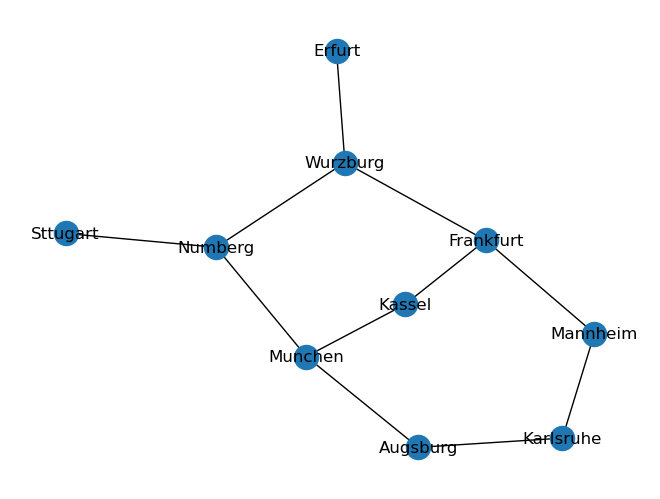

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

grafo = nx.Graph()

grafo.add_node('Frankfurt')

grafo.add_edge('Frankfurt', 'Mannheim')
grafo.add_edge('Mannheim', 'Karlsruhe')
grafo.add_edge('Karlsruhe', 'Augsburg')
grafo.add_edge('Augsburg', 'Munchen')


grafo.add_edge('Frankfurt', 'Wurzburg')
grafo.add_edge('Wurzburg', 'Numberg')
grafo.add_edge('Wurzburg', 'Erfurt')
grafo.add_edge('Numberg', 'Munchen')
grafo.add_edge('Numberg', 'Sttugart')


grafo.add_edge('Frankfurt', 'Kassel')
grafo.add_edge('Kassel', 'Munchen')

nx.draw(grafo, with_labels=True)

plt.show()

After graph the steps you need to implement a search algorithm to provee all step to find the better way to go from **Frankfurt** to **Munchen**

In [40]:
print(grafo['Frankfurt'])

for child in grafo['Frankfurt']:
    print(child)

{'Mannheim': {}, 'Wurzburg': {}, 'Kassel': {}}
Mannheim
Wurzburg
Kassel


In [39]:
# print(grafo['Kassel'])

start = 'Numberg'
end = 'Kassel'

queue = []
visited = []

queue.append({
    'visited': True,
    'node': start,
    'count': 1,
})

# this search a random value path
def search():
    while queue:
        node = queue.pop()
        if node['node'] == end:
            return node

        for child in grafo[node['node']]:
            if child not in visited:
                visited.append(child)
                
                queue.append({
                    'parent': node,
                    'count': node['count'] + 1,
                    'visited': True,
                    'node': child,
                })

result = search()

print(result)


{'parent': {'parent': {'visited': True, 'node': 'Numberg', 'count': 1}, 'count': 2, 'visited': True, 'node': 'Munchen'}, 'count': 3, 'visited': True, 'node': 'Kassel'}


# Search the lower km recorred

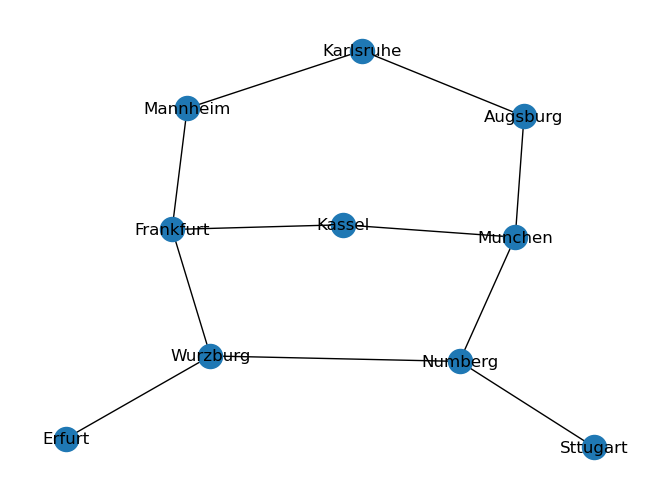

In [48]:
grafoKm = nx.Graph()

grafoKm.add_node('Frankfurt', attr={'km': 0}, length=100)

grafoKm.add_edge('Frankfurt', 'Mannheim')
grafoKm.add_edge('Mannheim', 'Karlsruhe')
grafoKm.add_edge('Karlsruhe', 'Augsburg')
grafoKm.add_edge('Augsburg', 'Munchen')


grafoKm.add_edge('Frankfurt', 'Wurzburg')
grafoKm.add_edge('Wurzburg', 'Numberg')
grafoKm.add_edge('Wurzburg', 'Erfurt')
grafoKm.add_edge('Numberg', 'Munchen')
grafoKm.add_edge('Numberg', 'Sttugart')


grafoKm.add_edge('Frankfurt', 'Kassel')
grafoKm.add_edge('Kassel', 'Munchen')


edgesWithKm = [
    ('Frankfurt', 'Mannheim', 85),
    ('Mannheim', 'Karlsruhe', 80),
    ('Karlsruhe', 'Augsburg', 250),
    ('Augsburg', 'Munchen', 84),
    ('Frankfurt', 'Wurzburg', 217),
    ('Wurzburg', 'Numberg', 103),
    ('Wurzburg', 'Erfurt', 186),
    ('Numberg', 'Munchen', 167),
    ('Numberg', 'Sttugart', 183),
    ('Frankfurt', 'Kassel', 173),
    ('Kassel', 'Munchen', 502)
]

grafoKm.add_edges_from(edgesWithKm)

nx.draw(grafoKm, with_labels=True)

plt.show()

In [92]:
# get km from Frankfurt to Kassel
# print(grafoKm.edges(data=True))

start = 'Numberg'
end = 'Kassel'

queue = []
visited = []

def searchLower(initialKm, node):

    queue.append({
        'node': node,
        'km': initialKm
    })

    if node == end:
        return initialKm
    
    for rute in grafoKm[node]:
        if rute not in visited:
            visited.append(rute)
            return searchLower(initialKm + grafoKm.edges[node, rute]['attr']['km'], rute)

for rute in grafoKm[start]:
    visited = [start]
    queue = []
    print(rute)
    
    print(searchLower(grafoKm.edges[start, rute]['attr']['km'], rute))

    print(queue)




Wurzburg
1321
[{'node': 'Wurzburg', 'km': 103}, {'node': 'Frankfurt', 'km': 320}, {'node': 'Mannheim', 'km': 405}, {'node': 'Karlsruhe', 'km': 485}, {'node': 'Augsburg', 'km': 735}, {'node': 'Munchen', 'km': 819}, {'node': 'Kassel', 'km': 1321}]
Munchen
None
[{'node': 'Munchen', 'km': 167}, {'node': 'Augsburg', 'km': 251}, {'node': 'Karlsruhe', 'km': 501}, {'node': 'Mannheim', 'km': 581}, {'node': 'Frankfurt', 'km': 666}, {'node': 'Wurzburg', 'km': 883}, {'node': 'Erfurt', 'km': 1069}]
Sttugart
None
[{'node': 'Sttugart', 'km': 183}]
